In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('static.csv', sep=';')
df.head(30)

,step_arrived,step_collisions,step_duration,step_ended,step_halting,step_inserted,step_loaded,step_meanSpeed,step_meanSpeedRelative,step_meanTravelTime,step_meanWaitingTime,step_running,step_stopped,step_teleports,step_time,step_waiting
0,0,0,285544395,0,4,4,37,0.00,0.00,-1.0,0.00,4,0,0,0.0,33
1,0,0,285544426,0,0,4,37,0.54,0.02,-1.0,0.00,4,0,0,1.0,33
2,0,0,285544457,0,0,4,37,1.15,0.04,-1.0,0.00,4,0,0,2.0,33
3,0,0,285544488,0,2,6,37,1.16,0.05,-1.0,1.00,6,0,0,3.0,31
4,0,0,285544519,0,0,6,37,1.84,0.07,-1.0,1.00,6,0,0,4.0,31
5,0,0,285544550,0,1,7,37,2.08,0.08,-1.0,1.57,7,0,0,5.0,30
6,0,0,285544582,0,3,10,37,1.80,0.07,-1.0,2.90,10,0,0,6.0,27
7,0,0,285544612,0,0,10,37,2.52,0.10,-1.0,2.90,10,0,0,7.0,27
8,0,0,285544644,0,0,10,37,3.13,0.12,-1.0,2.90,10,0,0,8.0,27
9,0,0,285544675,0,2,12,37,3.21,0.12,-1.0,3.92,12,0,0,9.0,25


In [3]:
df.columns.values

array(['step_arrived', 'step_collisions', 'step_duration', 'step_ended',
       'step_halting', 'step_inserted', 'step_loaded', 'step_meanSpeed',
       'step_meanSpeedRelative', 'step_meanTravelTime',
       'step_meanWaitingTime', 'step_running', 'step_stopped',
       'step_teleports', 'step_time', 'step_waiting'], dtype=object)

In [4]:
def csv_to_df(path):
    df = pd.read_csv(path, sep=';')
    clean_df = df.dropna(subset=['step_meanSpeed'])
    clean_df = clean_df.groupby('step_time').mean().reset_index().sort_values(by='step_time')
    clean_df['step_time'] = clean_df['step_time'].apply(lambda x: int(x))
    return clean_df

def bin_df(df, size):
    df['bin'] = pd.cut(df['step_time'], np.arange(0,df.shape[0], size))
    df = df.groupby('bin').mean()
    return df

In [5]:
static_df = csv_to_df('static.csv')
actuated_df = csv_to_df('actuated.csv')
dqn_df = csv_to_df('dqn.csv')

In [6]:
max_len = 0
df_list = [static_df, actuated_df, dqn_df]
legend_list = ['Static', 'Actuated', 'Deep Q-Network']

def plot_by_category(df_list, legend_list, category, title, x_label=None, y_label=None):
    fig, ax = plt.subplots(nrows=3, figsize=[15,15])

    for i, legend in zip(df_list, legend_list):
        i = bin_df(i, 300)
        ax[0].plot(i['step_time'], i[category], label=legend)
    ax[0].set_title(f'{title} at 5 Minute Intervals')
    ax[0].legend()
    
    for i, legend in zip(df_list, legend_list):
        i = bin_df(i, 600)
        ax[1].plot(i['step_time'], i[category], label=legend)
    ax[1].set_title(f'{title} at 10 Minute Intervals')
    ax[1].legend()


    for i, legend in zip(df_list, legend_list):
        i = bin_df(i, 900)
        ax[2].plot(i['step_time'], i[category], label=legend)
    ax[2].set_title(f'{title} at 15 Minute Intervals')
    ax[2].legend()
    
    for i in ax:
        i.set_xlabel(x_label)
        i.set_ylabel(y_label)
    fig.tight_layout()
    return fig, ax

Text(0.5, 114.0, 'Simulation Time (s)\n$average speed = \\frac{\\sum vehicle speed_t}{N_t}$')

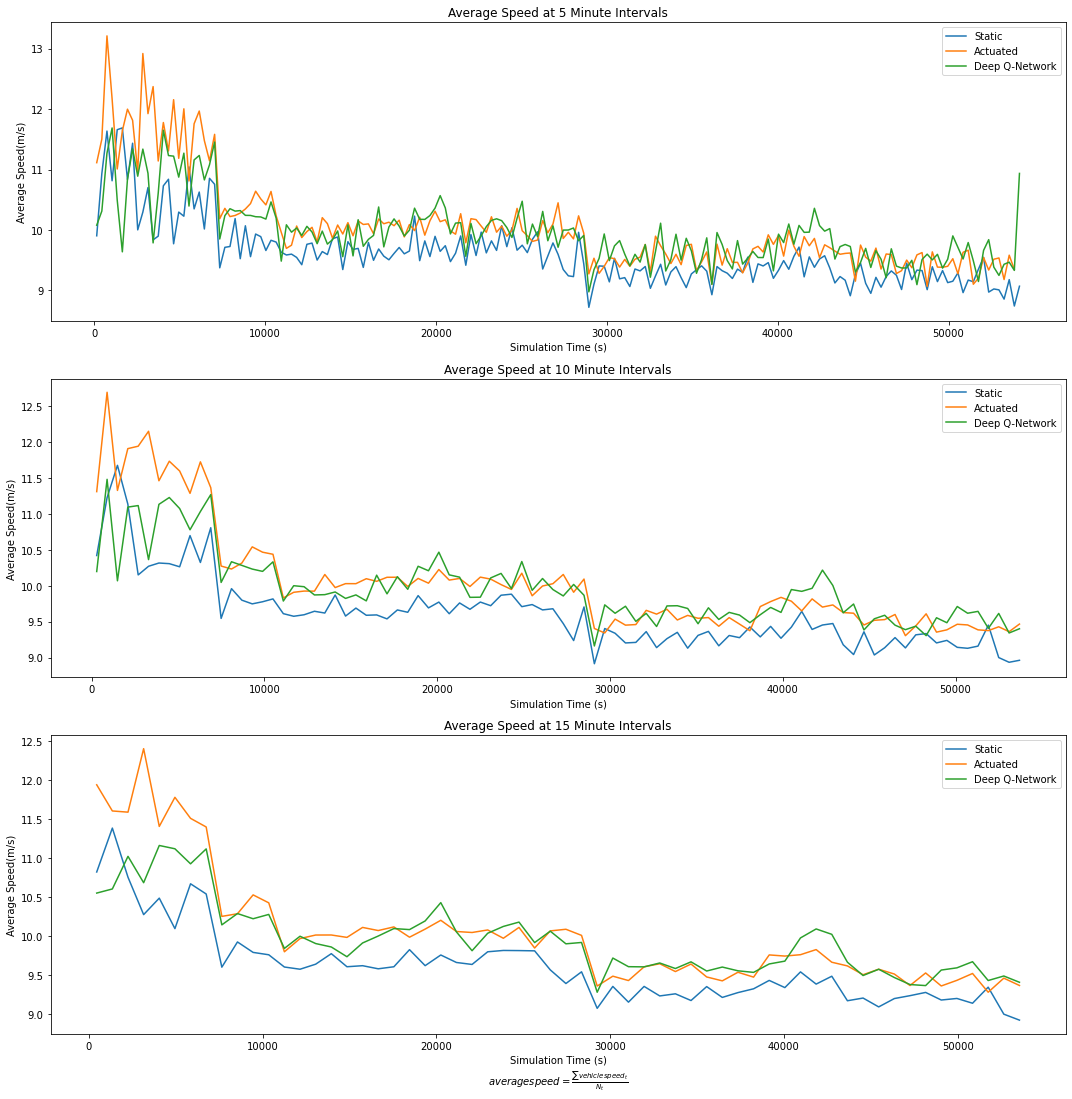

In [7]:
average_speed_fig, average_speed_ax = plot_by_category(df_list, legend_list, 'step_meanSpeed','Average Speed', 'Simulation Time (s)', 'Average Speed(m/s)')
average_speed_ax[-1].set_xlabel('Simulation Time (s)\n' +r'$average speed = \frac{\sum vehicle speed_t}{N_t}$')


Text(0.5, 114.0, 'Simulation Time (s)\n$average waiting time= \\frac{\\sum waiting time_t}{N_t}$')

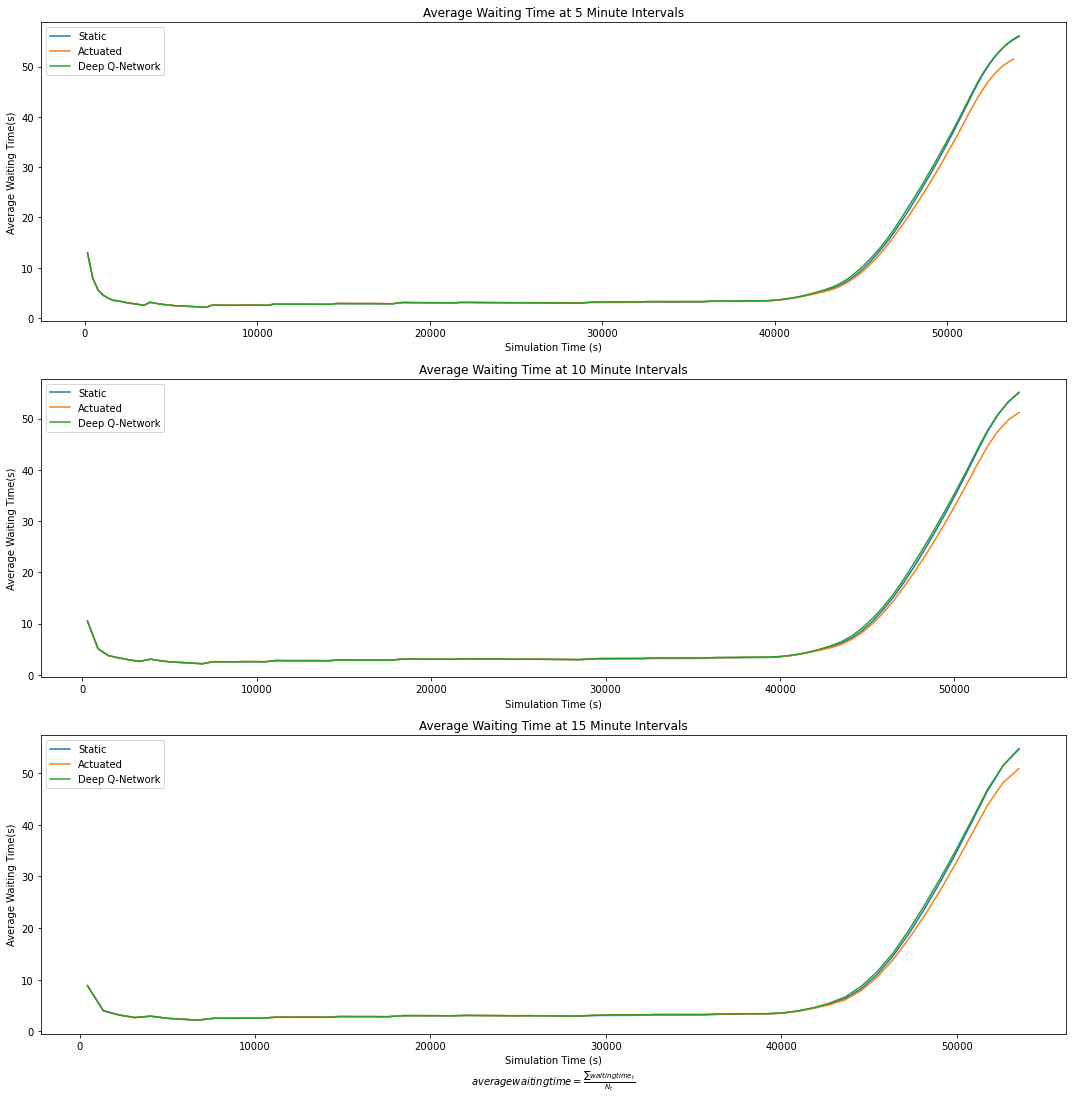

In [8]:
waiting_fig, waiting_ax = plot_by_category(df_list, legend_list, 'step_meanWaitingTime','Average Waiting Time', 'Simulation Time (s)', 'Average Waiting Time(s)' )
waiting_ax[-1].set_xlabel('Simulation Time (s)\n' +r'$average waiting time= \frac{\sum waiting time_t}{N_t}$')

Text(0.5, 114.0, 'Simulation Time (s)\n$average travel time= \\frac{\\sum travel speed_t}{N_t}$')

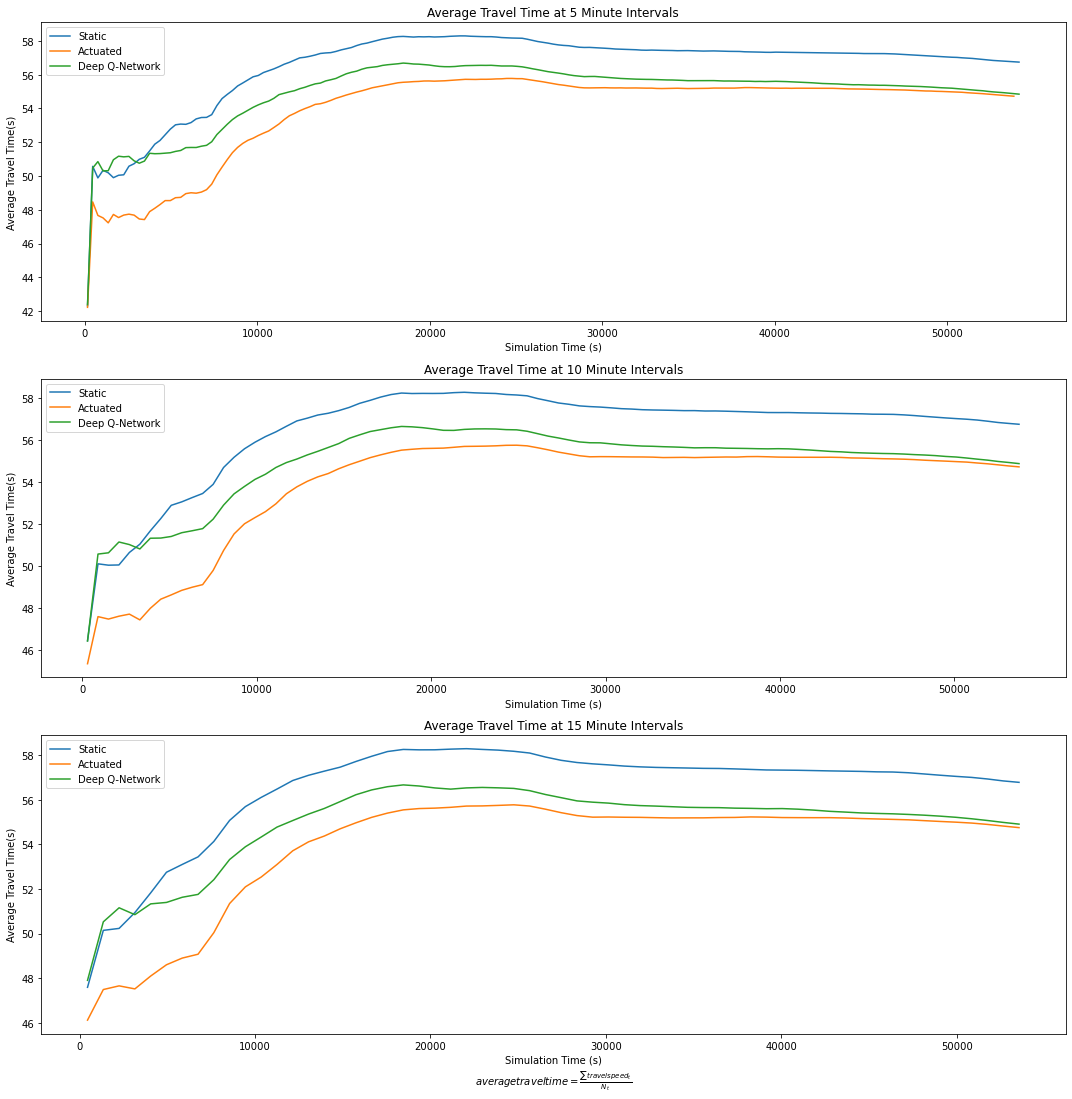

In [9]:
travel_time_fig, travel_time_ax = plot_by_category(df_list, legend_list, 'step_meanTravelTime','Average Travel Time','Simulation Time (s)', 'Average Travel Time(s)')
travel_time_ax[-1].set_xlabel('Simulation Time (s)\n' +r'$average travel time= \frac{\sum travel speed_t}{N_t}$')

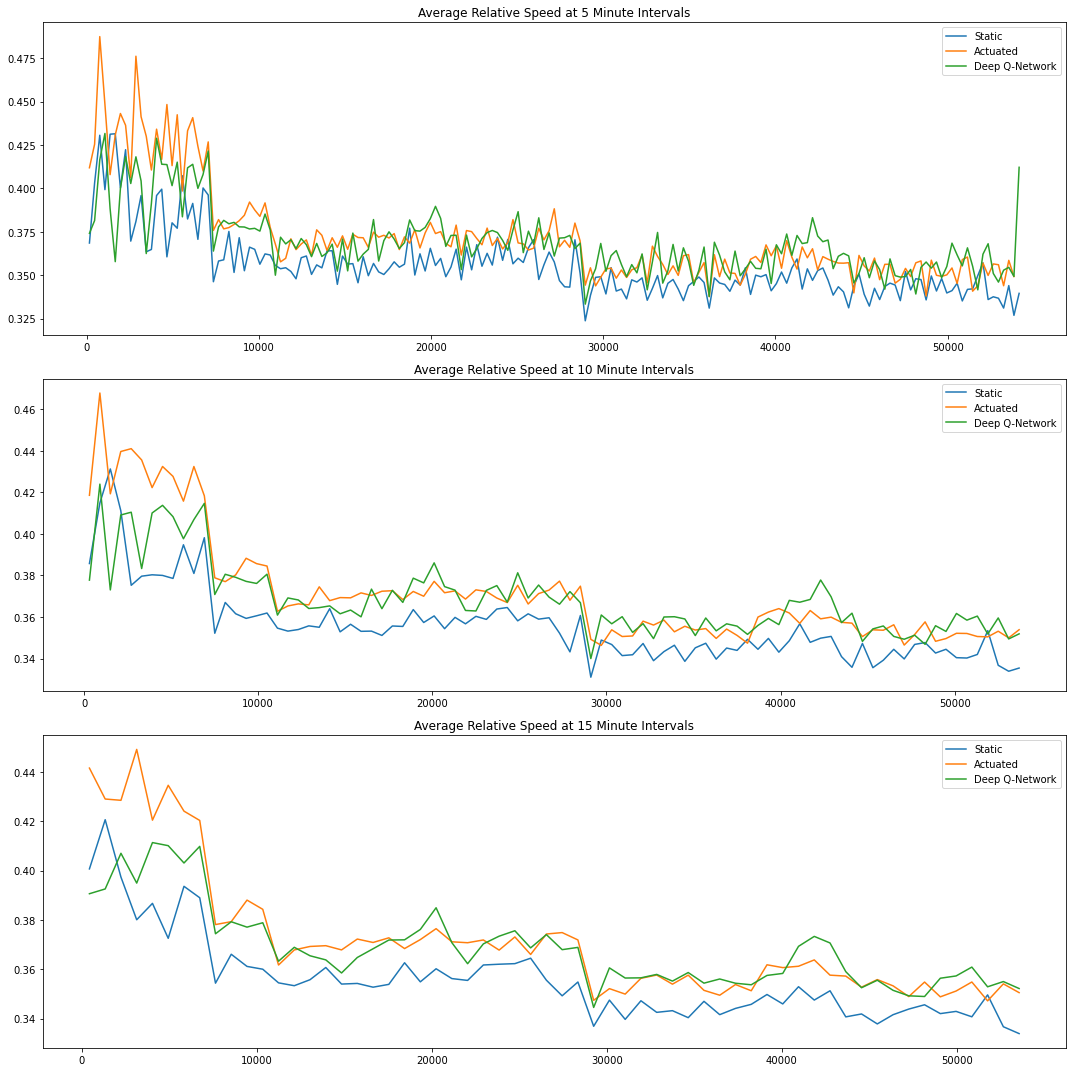

In [10]:
average_relative_speed_fig, average_relative_speed_ax = plot_by_category(df_list, legend_list, 'step_meanSpeedRelative','Average Relative Speed')

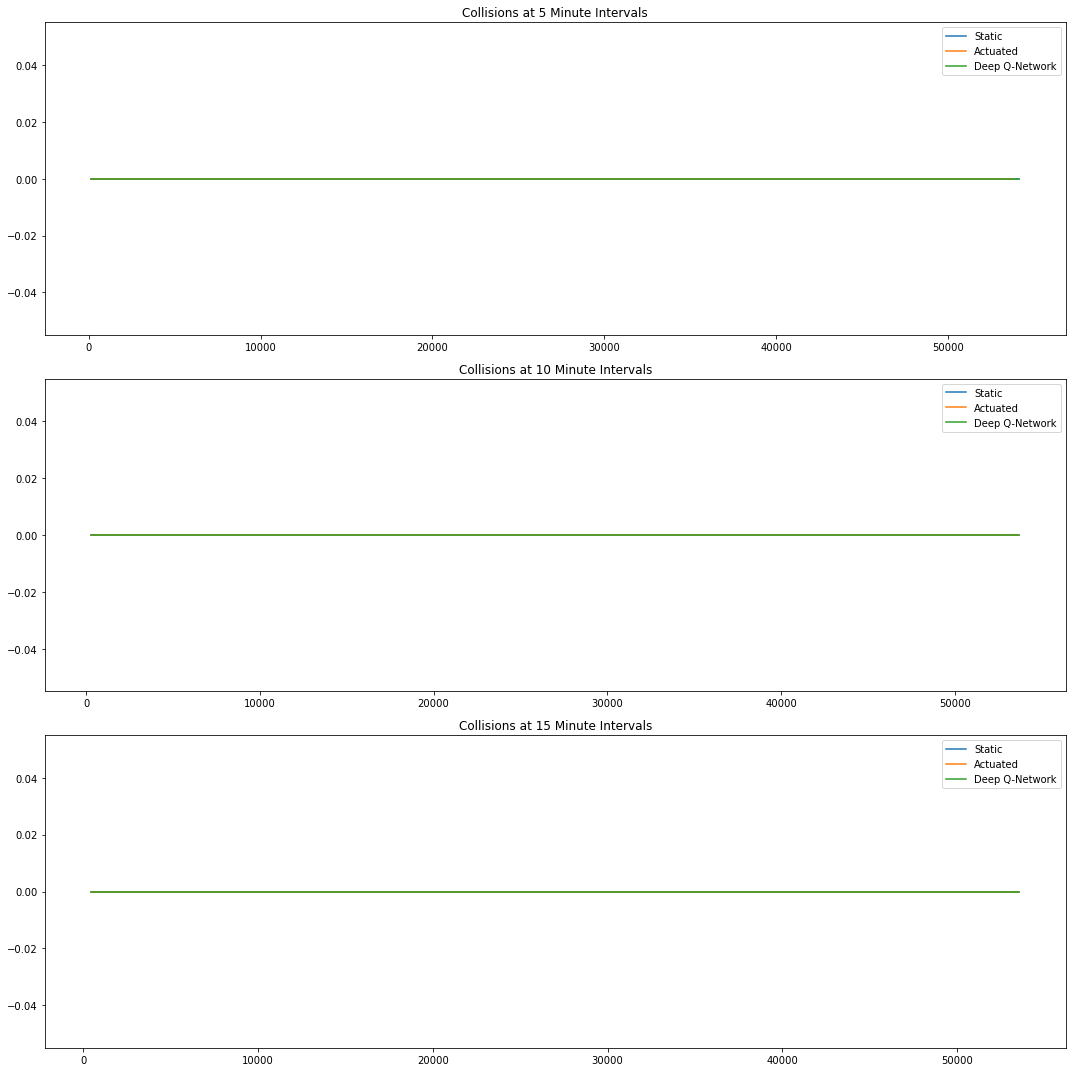

In [11]:
collisions_fig, collisions_ax = plot_by_category(df_list, legend_list, 'step_collisions','Collisions')

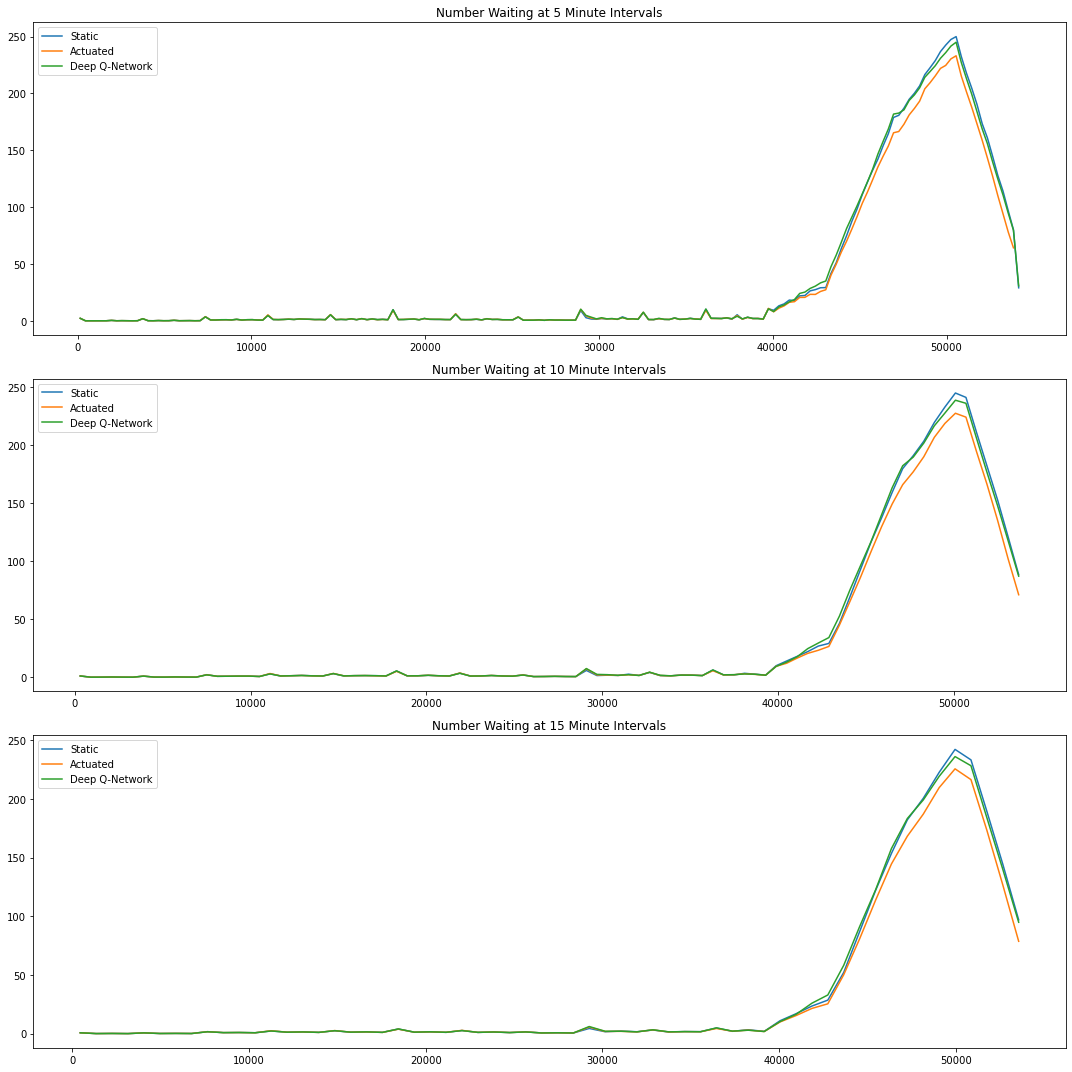

In [12]:
no_waiting_fig, no_waiting_ax = plot_by_category(df_list, legend_list, 'step_waiting', 'Number Waiting')

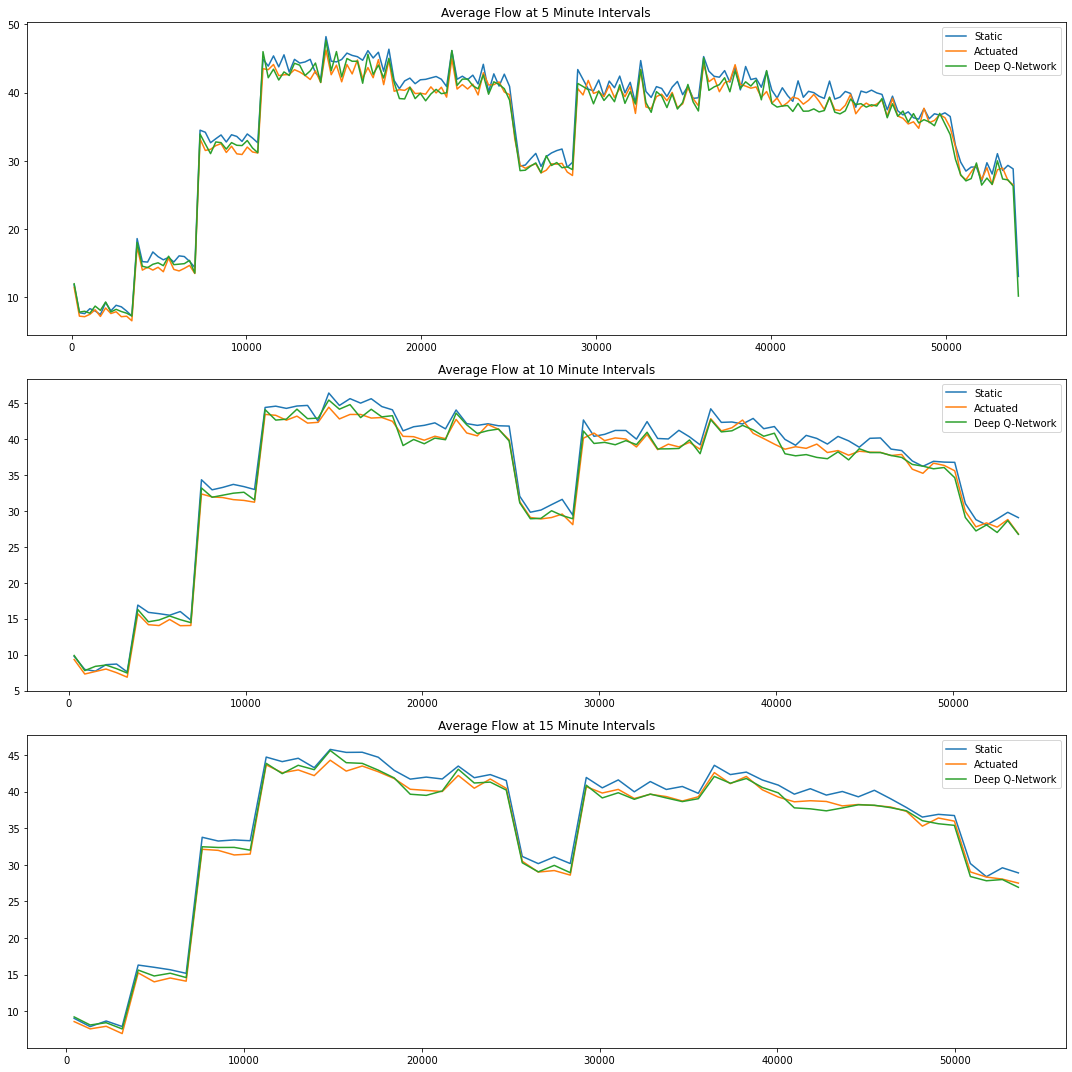

In [13]:
loaded_df, loaded_ax = plot_by_category(df_list, legend_list, "step_running", "Average Flow")

In [14]:
static_df.tail(5)

,step_time,step_arrived,step_collisions,step_duration,step_ended,step_halting,step_inserted,step_loaded,step_meanSpeed,step_meanSpeedRelative,step_meanTravelTime,step_meanWaitingTime,step_running,step_stopped,step_teleports,step_waiting,bin
54298,54298,33836.0,0.0,285598977.0,33836.0,0.0,33837.0,33837.0,21.28,0.77,56.73,56.3,1.0,0.0,0.0,0.0,NaN
54299,54299,33836.0,0.0,285598978.0,33836.0,0.0,33837.0,33837.0,21.37,0.77,56.73,56.3,1.0,0.0,0.0,0.0,NaN
54300,54300,33836.0,0.0,285598978.0,33836.0,0.0,33837.0,33837.0,21.11,0.76,56.73,56.3,1.0,0.0,0.0,0.0,NaN
54301,54301,33836.0,0.0,285598978.0,33836.0,0.0,33837.0,33837.0,21.35,0.77,56.73,56.3,1.0,0.0,0.0,0.0,NaN
54302,54302,33837.0,0.0,285598979.0,33837.0,0.0,33837.0,33837.0,-1.00,-1.00,56.73,56.3,0.0,0.0,0.0,0.0,NaN


In [ ]:
plt.savefig()